In [1]:
#imutils to make opencv fuctions simple
import imutils
# easyocr for optical character recognition
import easyocr
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

read and preprocess the image to black and white

function to show an openCV image ie(bgr)

In [2]:
def display(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)

###  preprocessing with threshold

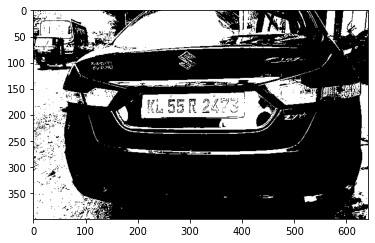

In [3]:
img = cv.imread('images/bcar.jpg')
display(img)
im = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
display(im)
_,i = cv.threshold(im,145,255,cv.THRESH_BINARY)  # _ under_score will have the threshold value
display(i)

### preprocessing with bilateralFilter and Canny edge

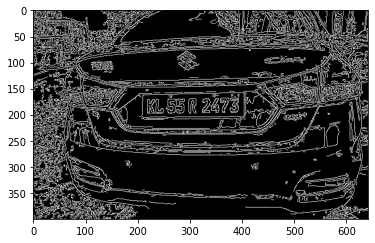

In [11]:
# Canny without noise reduction

img = cv.imread('images/bcar.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edged = cv.Canny(img,30,100)
display(edged)

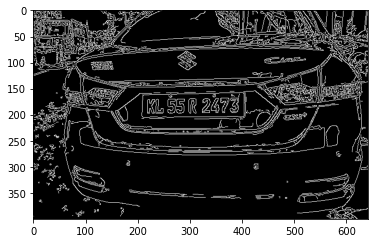

In [12]:
img = cv.imread('images/bcar.jpg')
im = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
i = cv.bilateralFilter(im,11,17,17)#noise reduction they say
display(i)
edged = cv.Canny(i,30,100)
display(edged)

## FINDING REGION OF INTEREST

In [13]:
keypoints = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv.contourArea,reverse=True)


In [14]:
location = None
for contour in contours:
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [15]:
location

array([[[404, 159]],

       [[211, 162]],

       [[208, 202]],

       [[405, 205]]], dtype=int32)

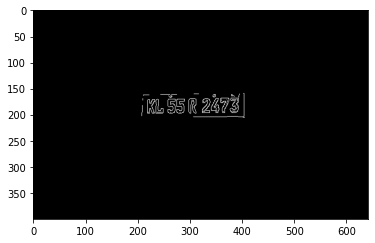

In [16]:
mask = np.zeros(im.shape,dtype='uint8')

new_img = cv.drawContours(mask,[location],-1,255,-1)

plate = cv.bitwise_and(edged,edged,mask=mask)
display(plate)

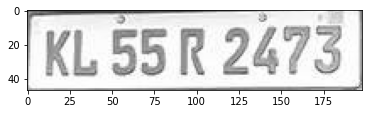

In [17]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = im[x1:x2+1, y1:y2+1]
display(cropped_image)

## OCR 

In [18]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [19]:
result = reader.readtext(cropped_image)
result[0][1]

'KL 55R 2473'